In [95]:
import numpy as np
import pandas as pd
import doubletdetection
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib
plt.style.use('ggplot')
matplotlib.use( 'tkagg' )

%matplotlib inline 

In [127]:
# read the train data

df_train = pd.read_csv("../train/training.csv", header=None)
df_train.columns = ['UMI', 'doublet']
df_train

,UMI,doublet
0,GCTCTGTCAATGGATA,1
1,GATGAGGGTACGAAAT,0
2,AGGCCACGTACAGCAG,0
3,ACGCCGAGTCACACGC,0
4,TCTTCGGAGGCTAGCA,0
...,...,...
995,ACTGCTCCACTCGACG,0
996,TGGTTAGGTAAACGCG,0
997,TTCTCAATCAGTACGT,1
998,TGAGCCGGTCTCTTAT,0


In [133]:
# read the test data 

adata = sc.read_h5ad('../test_data/sce.h5ad') 

In [97]:
adata.obs

""
AGAGCGAAGATCTGCT
ACATCAGTCTGACCTC
TTCTCCTGTCCTGCTT
GAAACTCTCATGTAGC
CAGTCCTGTCTAGCCG
...
TTTATGCTCTTGTACT
ATAACGCCAAGCTGGA
ATTACTCAGTGGACGT
CGTGTCTCAAGCGTAG


In [106]:
clf = doubletdetection.BoostClassifier(
    n_iters=26,
    boost_rate=0.20,
    clustering_algorithm="louvain",
    standard_scaling=True,
    #verbose=True,
    #training_data=df_train['UMI'],
    #rna_data=adata.obs,
    #pseudocount=0.1,
    #n_jobs=-1,
)

In [107]:
clf.fit(adata.X)

  0%|          | 0/25 [00:00<?, ?it/s]

Last iteration with training data: 26/26


In [16]:
eval(f"1e-{16}")

1e-16

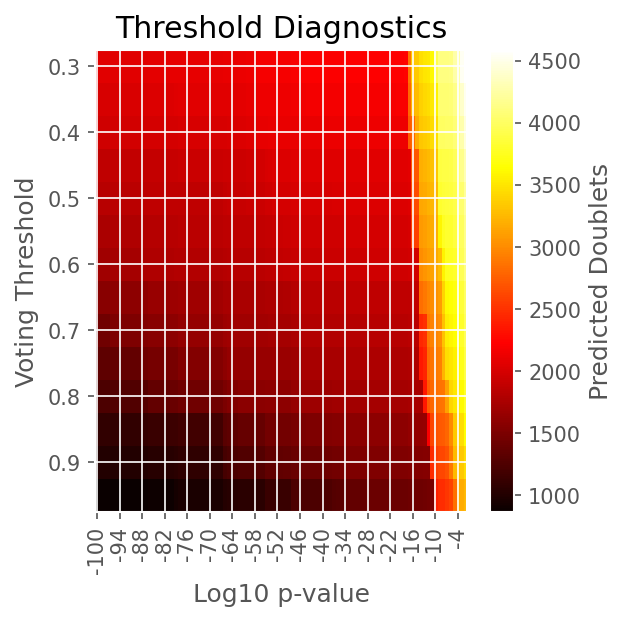

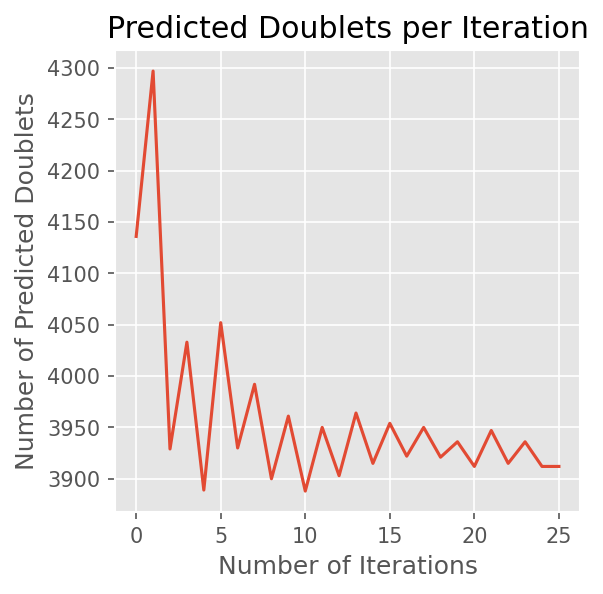

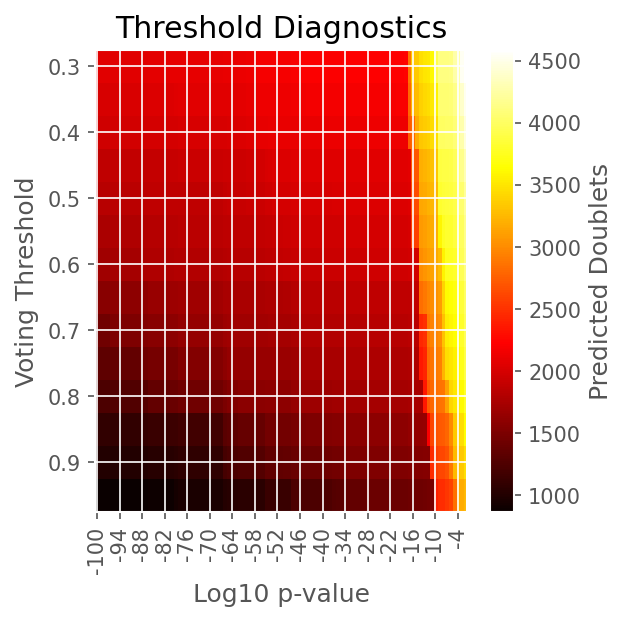

In [108]:
### Figures ###
pred_count = 8 
doubletdetection.plot.convergence(clf, save=f'../prediction/prediction{pred_count}/convergence_test.pdf', show=False, p_thresh=1e-5, voter_thresh=0.5)
doubletdetection.plot.threshold(clf, save=f'../prediction/prediction{pred_count}/threshold_test.pdf', show=False, p_step=6)

In [100]:
for thresh in range(1, 13):
    doublets = clf.predict(p_thresh=eval(f"1e-{thresh}"), voter_thresh=0.95)
    doublet_score = clf.doublet_score()
    adata.obs[f"doublet_{thresh}"] = doublets
    adata.obs[f"doublet_score_{thresh}"] = doublet_score

In [122]:
for voter_thresh in range(3, 10):
    doublets = clf.predict(p_thresh=1e-30, voter_thresh=voter_thresh/10)
    doublet_score = clf.doublet_score()
    adata.obs[f"doublet_{voter_thresh/10}"] = doublets
    adata.obs[f"doublet_score_{voter_thresh/10}"] = doublet_score

In [123]:
adata.obs

,doublet_1,doublet_score_1,doublet_2,doublet_score_2,doublet_3,doublet_score_3,doublet_4,doublet_score_4,doublet_5,doublet_score_5,...,doublet_0.7,doublet_score_0.7,doublet_0.8,doublet_score_0.8,doublet_0.9,doublet_score_0.9,doublet_0.3,doublet_score_0.3,doublet_0.4,doublet_score_0.4
AGAGCGAAGATCTGCT,1.0,3.406877e+01,1.0,3.406877e+01,1.0,3.406877e+01,1.0,3.406877e+01,1.0,3.406877e+01,...,0.0,3.441366e+01,0.0,3.441366e+01,0.0,3.441366e+01,0.0,3.441366e+01,0.0,3.441366e+01
ACATCAGTCTGACCTC,1.0,2.626024e+01,1.0,2.626024e+01,1.0,2.626024e+01,1.0,2.626024e+01,1.0,2.626024e+01,...,0.0,2.171874e+01,0.0,2.171874e+01,0.0,2.171874e+01,0.0,2.171874e+01,0.0,2.171874e+01
TTCTCCTGTCCTGCTT,1.0,3.406877e+01,1.0,3.406877e+01,1.0,3.406877e+01,1.0,3.406877e+01,1.0,3.406877e+01,...,0.0,3.441366e+01,0.0,3.441366e+01,0.0,3.441366e+01,0.0,3.441366e+01,0.0,3.441366e+01
GAAACTCTCATGTAGC,1.0,2.626024e+01,1.0,2.626024e+01,1.0,2.626024e+01,1.0,2.626024e+01,1.0,2.626024e+01,...,0.0,2.171874e+01,0.0,2.171874e+01,0.0,2.171874e+01,0.0,2.171874e+01,0.0,2.171874e+01
CAGTCCTGTCTAGCCG,1.0,2.626024e+01,1.0,2.626024e+01,1.0,2.626024e+01,1.0,2.626024e+01,1.0,2.626024e+01,...,0.0,2.171874e+01,0.0,2.171874e+01,0.0,2.171874e+01,0.0,2.171874e+01,0.0,2.171874e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTATGCTCTTGTACT,0.0,6.301277e-33,0.0,6.301277e-33,0.0,6.301277e-33,0.0,6.301277e-33,0.0,6.301277e-33,...,0.0,1.616266e-36,0.0,1.616266e-36,0.0,1.616266e-36,0.0,1.616266e-36,0.0,1.616266e-36
ATAACGCCAAGCTGGA,0.0,6.301224e-33,0.0,6.301224e-33,0.0,6.301224e-33,0.0,6.301224e-33,0.0,6.301224e-33,...,0.0,2.675346e-40,0.0,2.675346e-40,0.0,2.675346e-40,0.0,2.675346e-40,0.0,2.675346e-40
ATTACTCAGTGGACGT,0.0,1.043544e-40,0.0,1.043544e-40,0.0,1.043544e-40,0.0,1.043544e-40,0.0,1.043544e-40,...,0.0,3.546875e-41,0.0,3.546875e-41,0.0,3.546875e-41,0.0,3.546875e-41,0.0,3.546875e-41
CGTGTCTCAAGCGTAG,0.0,3.008038e-21,0.0,3.008038e-21,0.0,3.008038e-21,0.0,3.008038e-21,0.0,3.008038e-21,...,0.0,2.661390e-29,0.0,2.661390e-29,0.0,2.661390e-29,0.0,2.661390e-29,0.0,2.661390e-29


In [124]:
df_detected = adata.obs

In [125]:
df_detected = df_detected.reset_index(names=['UMI'])
df_detected

,UMI,doublet_1,doublet_score_1,doublet_2,doublet_score_2,doublet_3,doublet_score_3,doublet_4,doublet_score_4,doublet_5,...,doublet_0.7,doublet_score_0.7,doublet_0.8,doublet_score_0.8,doublet_0.9,doublet_score_0.9,doublet_0.3,doublet_score_0.3,doublet_0.4,doublet_score_0.4
0,AGAGCGAAGATCTGCT,1.0,3.406877e+01,1.0,3.406877e+01,1.0,3.406877e+01,1.0,3.406877e+01,1.0,...,0.0,3.441366e+01,0.0,3.441366e+01,0.0,3.441366e+01,0.0,3.441366e+01,0.0,3.441366e+01
1,ACATCAGTCTGACCTC,1.0,2.626024e+01,1.0,2.626024e+01,1.0,2.626024e+01,1.0,2.626024e+01,1.0,...,0.0,2.171874e+01,0.0,2.171874e+01,0.0,2.171874e+01,0.0,2.171874e+01,0.0,2.171874e+01
2,TTCTCCTGTCCTGCTT,1.0,3.406877e+01,1.0,3.406877e+01,1.0,3.406877e+01,1.0,3.406877e+01,1.0,...,0.0,3.441366e+01,0.0,3.441366e+01,0.0,3.441366e+01,0.0,3.441366e+01,0.0,3.441366e+01
3,GAAACTCTCATGTAGC,1.0,2.626024e+01,1.0,2.626024e+01,1.0,2.626024e+01,1.0,2.626024e+01,1.0,...,0.0,2.171874e+01,0.0,2.171874e+01,0.0,2.171874e+01,0.0,2.171874e+01,0.0,2.171874e+01
4,CAGTCCTGTCTAGCCG,1.0,2.626024e+01,1.0,2.626024e+01,1.0,2.626024e+01,1.0,2.626024e+01,1.0,...,0.0,2.171874e+01,0.0,2.171874e+01,0.0,2.171874e+01,0.0,2.171874e+01,0.0,2.171874e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21949,TTTATGCTCTTGTACT,0.0,6.301277e-33,0.0,6.301277e-33,0.0,6.301277e-33,0.0,6.301277e-33,0.0,...,0.0,1.616266e-36,0.0,1.616266e-36,0.0,1.616266e-36,0.0,1.616266e-36,0.0,1.616266e-36
21950,ATAACGCCAAGCTGGA,0.0,6.301224e-33,0.0,6.301224e-33,0.0,6.301224e-33,0.0,6.301224e-33,0.0,...,0.0,2.675346e-40,0.0,2.675346e-40,0.0,2.675346e-40,0.0,2.675346e-40,0.0,2.675346e-40
21951,ATTACTCAGTGGACGT,0.0,1.043544e-40,0.0,1.043544e-40,0.0,1.043544e-40,0.0,1.043544e-40,0.0,...,0.0,3.546875e-41,0.0,3.546875e-41,0.0,3.546875e-41,0.0,3.546875e-41,0.0,3.546875e-41
21952,CGTGTCTCAAGCGTAG,0.0,3.008038e-21,0.0,3.008038e-21,0.0,3.008038e-21,0.0,3.008038e-21,0.0,...,0.0,2.661390e-29,0.0,2.661390e-29,0.0,2.661390e-29,0.0,2.661390e-29,0.0,2.661390e-29


In [126]:
for voter_thresh in range(3, 10):
    df_detected[f'doublet_assign_{voter_thresh/10}'] = df_detected[f'doublet_{voter_thresh/10}'].map(lambda x: 'doublet' if x==1 else 'singlet')

df_detected

,UMI,doublet_1,doublet_score_1,doublet_2,doublet_score_2,doublet_3,doublet_score_3,doublet_4,doublet_score_4,doublet_5,...,doublet_score_0.3,doublet_0.4,doublet_score_0.4,doublet_assign_0.3,doublet_assign_0.4,doublet_assign_0.5,doublet_assign_0.6,doublet_assign_0.7,doublet_assign_0.8,doublet_assign_0.9
0,AGAGCGAAGATCTGCT,1.0,3.406877e+01,1.0,3.406877e+01,1.0,3.406877e+01,1.0,3.406877e+01,1.0,...,3.441366e+01,0.0,3.441366e+01,singlet,singlet,singlet,singlet,singlet,singlet,singlet
1,ACATCAGTCTGACCTC,1.0,2.626024e+01,1.0,2.626024e+01,1.0,2.626024e+01,1.0,2.626024e+01,1.0,...,2.171874e+01,0.0,2.171874e+01,singlet,singlet,singlet,singlet,singlet,singlet,singlet
2,TTCTCCTGTCCTGCTT,1.0,3.406877e+01,1.0,3.406877e+01,1.0,3.406877e+01,1.0,3.406877e+01,1.0,...,3.441366e+01,0.0,3.441366e+01,singlet,singlet,singlet,singlet,singlet,singlet,singlet
3,GAAACTCTCATGTAGC,1.0,2.626024e+01,1.0,2.626024e+01,1.0,2.626024e+01,1.0,2.626024e+01,1.0,...,2.171874e+01,0.0,2.171874e+01,singlet,singlet,singlet,singlet,singlet,singlet,singlet
4,CAGTCCTGTCTAGCCG,1.0,2.626024e+01,1.0,2.626024e+01,1.0,2.626024e+01,1.0,2.626024e+01,1.0,...,2.171874e+01,0.0,2.171874e+01,singlet,singlet,singlet,singlet,singlet,singlet,singlet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21949,TTTATGCTCTTGTACT,0.0,6.301277e-33,0.0,6.301277e-33,0.0,6.301277e-33,0.0,6.301277e-33,0.0,...,1.616266e-36,0.0,1.616266e-36,singlet,singlet,singlet,singlet,singlet,singlet,singlet
21950,ATAACGCCAAGCTGGA,0.0,6.301224e-33,0.0,6.301224e-33,0.0,6.301224e-33,0.0,6.301224e-33,0.0,...,2.675346e-40,0.0,2.675346e-40,singlet,singlet,singlet,singlet,singlet,singlet,singlet
21951,ATTACTCAGTGGACGT,0.0,1.043544e-40,0.0,1.043544e-40,0.0,1.043544e-40,0.0,1.043544e-40,0.0,...,3.546875e-41,0.0,3.546875e-41,singlet,singlet,singlet,singlet,singlet,singlet,singlet
21952,CGTGTCTCAAGCGTAG,0.0,3.008038e-21,0.0,3.008038e-21,0.0,3.008038e-21,0.0,3.008038e-21,0.0,...,2.661390e-29,0.0,2.661390e-29,singlet,singlet,singlet,singlet,singlet,singlet,singlet


In [128]:
df_train = df_train.merge(df_detected, on='UMI', how='left')
df_train

,UMI,doublet,doublet_1,doublet_score_1,doublet_2,doublet_score_2,doublet_3,doublet_score_3,doublet_4,doublet_score_4,...,doublet_score_0.3,doublet_0.4,doublet_score_0.4,doublet_assign_0.3,doublet_assign_0.4,doublet_assign_0.5,doublet_assign_0.6,doublet_assign_0.7,doublet_assign_0.8,doublet_assign_0.9
0,GCTCTGTCAATGGATA,1,1.0,2.141757e+02,1.0,2.141757e+02,1.0,2.141757e+02,1.0,2.141757e+02,...,2.262032e+02,1.0,2.262032e+02,doublet,doublet,doublet,doublet,doublet,doublet,singlet
1,GATGAGGGTACGAAAT,0,1.0,2.744406e+02,1.0,2.744406e+02,1.0,2.744406e+02,1.0,2.744406e+02,...,2.997289e+02,1.0,2.997289e+02,doublet,doublet,doublet,doublet,doublet,doublet,doublet
2,AGGCCACGTACAGCAG,0,0.0,3.832739e-03,0.0,3.832739e-03,0.0,3.832739e-03,0.0,3.832739e-03,...,1.517575e-03,0.0,1.517575e-03,singlet,singlet,singlet,singlet,singlet,singlet,singlet
3,ACGCCGAGTCACACGC,0,0.0,1.260392e-19,0.0,1.260392e-19,0.0,1.260392e-19,0.0,1.260392e-19,...,1.254061e-31,0.0,1.254061e-31,singlet,singlet,singlet,singlet,singlet,singlet,singlet
4,TCTTCGGAGGCTAGCA,0,0.0,3.008038e-21,0.0,3.008038e-21,0.0,3.008038e-21,0.0,3.008038e-21,...,2.661390e-29,0.0,2.661390e-29,singlet,singlet,singlet,singlet,singlet,singlet,singlet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,ACTGCTCCACTCGACG,0,0.0,2.211326e-01,0.0,2.211326e-01,0.0,2.211326e-01,0.0,2.211326e-01,...,1.399805e-01,0.0,1.399805e-01,singlet,singlet,singlet,singlet,singlet,singlet,singlet
996,TGGTTAGGTAAACGCG,0,1.0,9.167237e+01,1.0,9.167237e+01,1.0,9.167237e+01,1.0,9.167237e+01,...,1.179205e+02,1.0,1.179205e+02,doublet,doublet,doublet,doublet,doublet,doublet,doublet
997,TTCTCAATCAGTACGT,1,1.0,3.179839e+02,1.0,3.179839e+02,1.0,3.179839e+02,1.0,3.179839e+02,...,3.234126e+02,1.0,3.234126e+02,doublet,doublet,doublet,doublet,doublet,doublet,doublet
998,TGAGCCGGTCTCTTAT,0,0.0,3.721808e-03,0.0,3.721808e-03,0.0,3.721808e-03,0.0,3.721808e-03,...,3.022156e-02,0.0,3.022156e-02,singlet,singlet,singlet,singlet,singlet,singlet,singlet


In [131]:
df_train['doublet_assign'] = df_train['doublet'].map(lambda x: 'doublet' if x==1 else 'singlet')

df_train

,UMI,doublet,doublet_1,doublet_score_1,doublet_2,doublet_score_2,doublet_3,doublet_score_3,doublet_4,doublet_score_4,...,doublet_0.4,doublet_score_0.4,doublet_assign_0.3,doublet_assign_0.4,doublet_assign_0.5,doublet_assign_0.6,doublet_assign_0.7,doublet_assign_0.8,doublet_assign_0.9,doublet_assign
0,GCTCTGTCAATGGATA,1,1.0,2.141757e+02,1.0,2.141757e+02,1.0,2.141757e+02,1.0,2.141757e+02,...,1.0,2.262032e+02,doublet,doublet,doublet,doublet,doublet,doublet,singlet,doublet
1,GATGAGGGTACGAAAT,0,1.0,2.744406e+02,1.0,2.744406e+02,1.0,2.744406e+02,1.0,2.744406e+02,...,1.0,2.997289e+02,doublet,doublet,doublet,doublet,doublet,doublet,doublet,singlet
2,AGGCCACGTACAGCAG,0,0.0,3.832739e-03,0.0,3.832739e-03,0.0,3.832739e-03,0.0,3.832739e-03,...,0.0,1.517575e-03,singlet,singlet,singlet,singlet,singlet,singlet,singlet,singlet
3,ACGCCGAGTCACACGC,0,0.0,1.260392e-19,0.0,1.260392e-19,0.0,1.260392e-19,0.0,1.260392e-19,...,0.0,1.254061e-31,singlet,singlet,singlet,singlet,singlet,singlet,singlet,singlet
4,TCTTCGGAGGCTAGCA,0,0.0,3.008038e-21,0.0,3.008038e-21,0.0,3.008038e-21,0.0,3.008038e-21,...,0.0,2.661390e-29,singlet,singlet,singlet,singlet,singlet,singlet,singlet,singlet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,ACTGCTCCACTCGACG,0,0.0,2.211326e-01,0.0,2.211326e-01,0.0,2.211326e-01,0.0,2.211326e-01,...,0.0,1.399805e-01,singlet,singlet,singlet,singlet,singlet,singlet,singlet,singlet
996,TGGTTAGGTAAACGCG,0,1.0,9.167237e+01,1.0,9.167237e+01,1.0,9.167237e+01,1.0,9.167237e+01,...,1.0,1.179205e+02,doublet,doublet,doublet,doublet,doublet,doublet,doublet,singlet
997,TTCTCAATCAGTACGT,1,1.0,3.179839e+02,1.0,3.179839e+02,1.0,3.179839e+02,1.0,3.179839e+02,...,1.0,3.234126e+02,doublet,doublet,doublet,doublet,doublet,doublet,doublet,doublet
998,TGAGCCGGTCTCTTAT,0,0.0,3.721808e-03,0.0,3.721808e-03,0.0,3.721808e-03,0.0,3.721808e-03,...,0.0,3.022156e-02,singlet,singlet,singlet,singlet,singlet,singlet,singlet,singlet


In [129]:
### Make summary of singlets and doublets and write to file ###

import json

results = dict()
for voter_thresh in range(3, 10):
    results[f'Voter_thresh: {voter_thresh/10}'] = df_detected[f'doublet_assign_{voter_thresh/10}'].value_counts().to_dict()

with open(f'../prediction/prediction{pred_count}/DoubletDetection_voter_thresh_summary.json', mode='w') as f:
    f.write(json.dumps(results, ensure_ascii=False, indent=4))

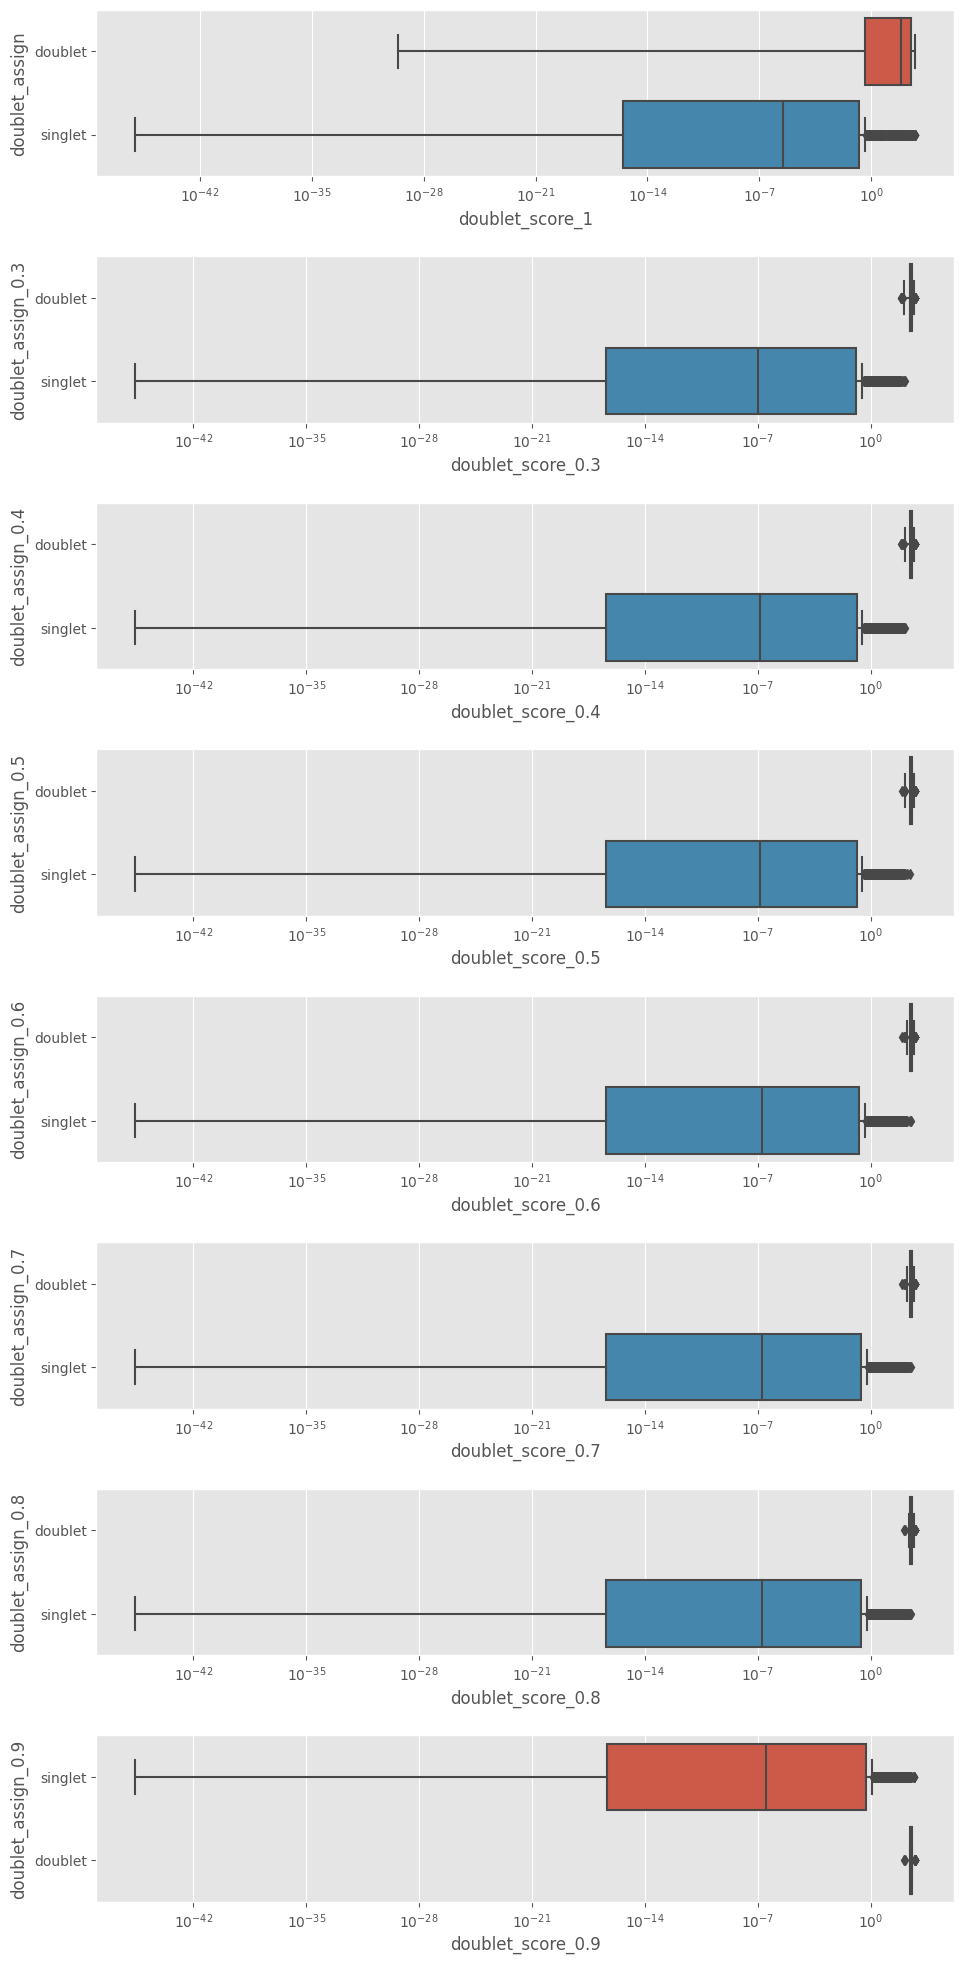

In [132]:
f, axes = plt.subplots(8, figsize = (10, 20))

sns.boxplot(x=df_train['doublet_score_1'], y=df_train['doublet_assign'], ax=axes[0])

for voter_thresh in range(3, 10):
    sns.boxplot(x=df_train[f'doublet_score_{voter_thresh/10}'], 
                y=df_train[f'doublet_assign_{voter_thresh/10}'], 
                ax=axes[voter_thresh-2])
    
for a in axes.ravel(): a.set_xscale('log')
f.tight_layout(pad=2.0)
plt.show()

In [76]:
df_detected.to_csv(f'../prediction/prediction{pred_count}/prediction.csv', index=None)

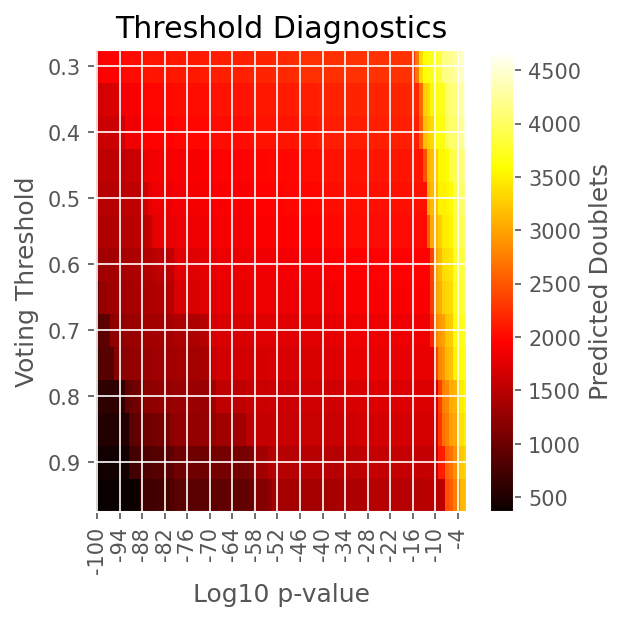

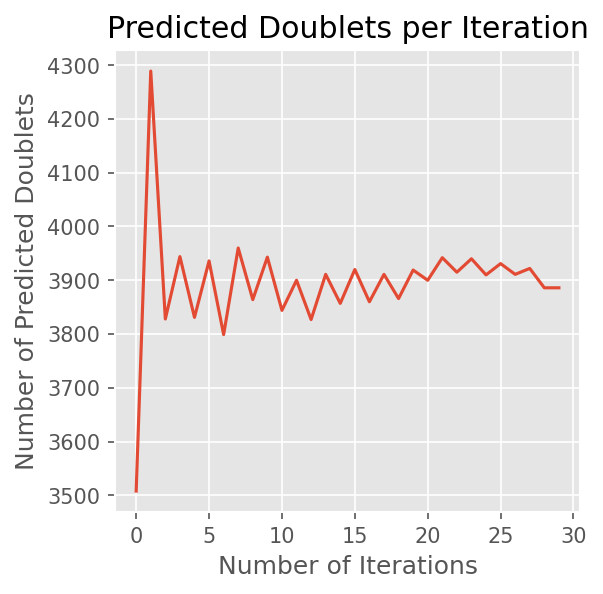

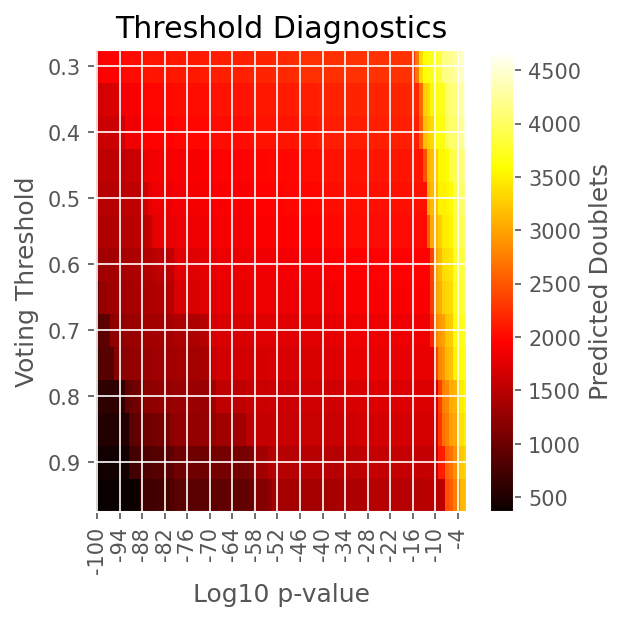

In [94]:
### Figures ###

doubletdetection.plot.convergence(clf, save=f'../prediction/prediction{pred_count}/convergence_test.pdf', show=False, p_thresh=1e-5, voter_thresh=0.5)
doubletdetection.plot.threshold(clf, save=f'../prediction/prediction{pred_count}/threshold_test.pdf', show=False, p_step=6)